# Introdução a Curvas Utilizando Manim e Sympy



## Referências

Livro Ronaldo Freire


## Texto da Asla:

Sequencia de exercícios (incluindo exercícios adicionais aos que foram passados nas listas), organizados de forma a servir de tutorial para o aprendizado dos elemsntos teóricos abordados em sala através de recursos computacionais.


## TODO

Resolver problemas que podem surgir como Colab

Exercícios para serem feitos:

Básico:

* L1Q1
* L2Q1

Médio:

* L3Q5
* L3Q3

Avançado:


* Desenhar curva a partir da curvatura
* Curvas em $\mathbb{R}^3$ com torção

**Autor**: Caio Lins

Este trabalho tem como objetivo introduzir conceitos da teoria de curvas planas e espaciais, utilizando as bibliotecas `Sympy` e `Manim` da linguagem de programação `Python`.


## Ambiente computacional

Utilizaremos a linguagem Python 3. A versão específica utilizada na elaboração desse documento é a 3.8.10.

A biblioteca [`Sympy`](https://www.sympy.org/en/index.html) permite a realização de cálculos simbólicos dentro de `Python` e será utilizada para computar algumas derivadas e integrais inerentes ao estudo da Geometria Diferencial.

Por outro lado, a biblioteca [`Manim`](https://docs.manim.community/en/stable/index.html) facilita imensamente a criação de animações envolvendo objetos matemáticos.
Ela surgiu como um projeto pessoal do YouTuber, e graduado em Matemática e Ciência da Computação por Stanford, Grant Sanderson, em seu (excelente!) canal [3Blue1Brown](https://www.youtube.com/c/3blue1brown).
Atualmente, ela é mantida como um projeto da comunidade.

Nos links acima é possível encontrar instruções para realizar a instalação de ambas bibliotecas.
Para a `Manim`, recomendamos instalá-la localmente, junto com todas as dependências listadas (opcionais e obrigatórias).

Caso não queira fazer isso no momento, uma opção é abrir esse notebook no Google Colab e executar a célula seguinte:

In [19]:
## Execute only when in colab

if 'google.colab' in str(get_ipython()):
    print('Running on Colab\n')
    !sudo apt update
    !sudo apt install libcairo2-dev ffmpeg \
        texlive texlive-latex-extra texlive-fonts-extra \
        texlive-latex-recommended texlive-science \
        tipa libpango1.0-dev
    !pip install manim
    !pip install IPython --upgrade
    !pip install sympy
else:
    print('Not running on Colab')

Not running on Colab


A formatação desse caderno é retirada do curso [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc), com código licenciado sob a MIT license (c) 2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan. Para carrega-lá, basta executar a célula seguinte.

In [18]:
# Load notebook style
from IPython.core.display import HTML
from os import getcwd
css_file = f'{getcwd()}/../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())

## Teoria de Curvas Regulares

Seja $I \subset \mathbb{R}$ um intervalo aberto.
Uma aplicação diferenciável (aqui, diferenciável significa $C^\infty$)
$$
    \alpha : I \to \mathbb{R}^n
$$
é dita uma *curva parametrizada diferenciável*.
Seu conjunto imagem, denotado por $\alpha(I) \subset \mathbb{R}^n$, é denominado *traço* de $\alpha$.

Em particular, caso $n = 2$, a função $\alpha$ pode ser escrita como
$$
    \alpha(t) = ( x(t), y(t) ),
$$
Onde $x, y : I \to \mathbb{R}$ são diferenciáveis.
Similarmente, se $n = 3$:
$$
    \alpha(t) = ( x(t), y(t), z(t) ).
$$

### Exemplo: O círculo

Seja $S^1 \subset \mathbb{R^2}$ o círculo unitário centrado na origem:
$$
    S^1 = \{ (x, y) \in \mathbb{R^2} : x^2 + y^2 = 1 \}
$$
Perceba que $S^1$ é o traço da curva $\alpha : [0, 2 \pi] \to \mathbb{R^2}$ dada por
$$
    \alpha (t) = (\cos t, \sin t).
$$

Vamos desenhar esse objeto utilizando a `Manim`. Primeiro, apresentaremos o código e, em seguida, explicaremos seus principais elementos.

In [20]:
import numpy as np
from manim import *

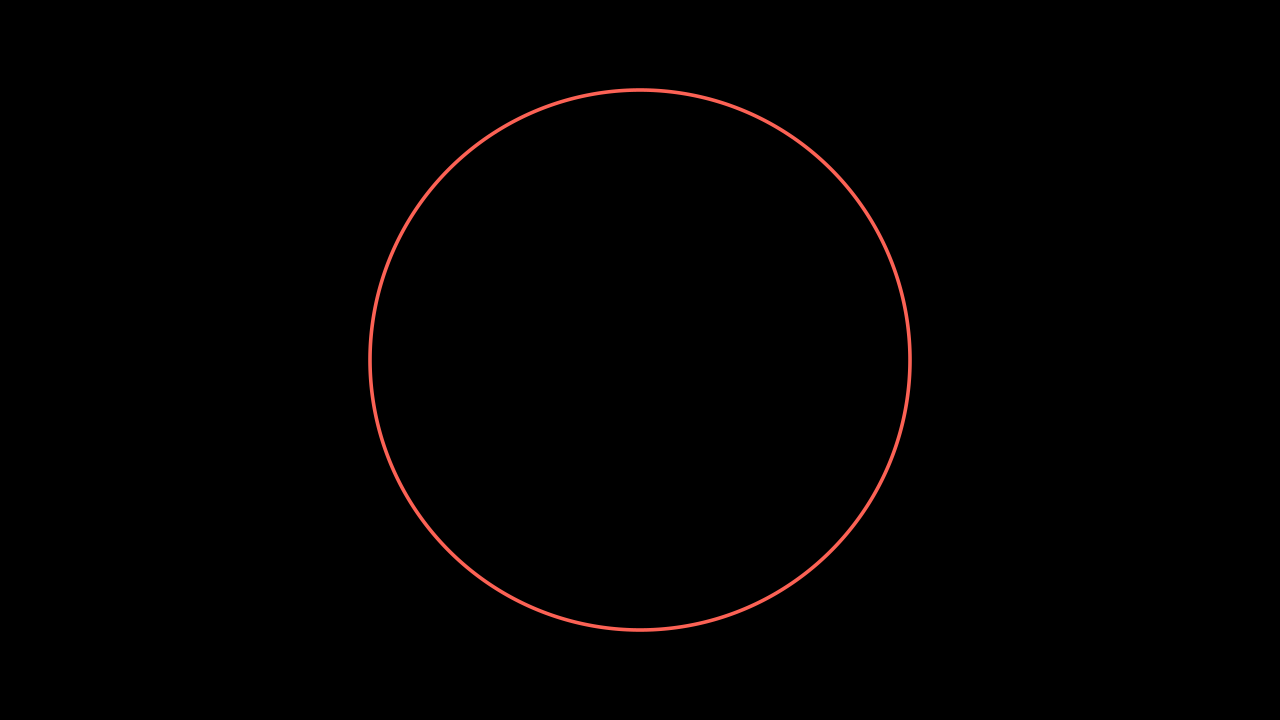

In [21]:
%%manim -qm -v WARNING ParametricCircle

class ParametricCircle(Scene):
    
    def alpha(self, t):
        return np.array([np.cos(t), np.sin(t), 0])
    
    def construct(self):
        circle = ParametricFunction(self.alpha,
                                    t_range=np.array([0, 2*PI]),
                                    fill_opacity=0).set_color(RED)
        self.add(circle.scale(3))

Vamos por partes. Primeiro, observe que importamos todas as funções do *namespace* da `Manim`. Isso, em geral, não é considerado uma boa prática em `Python`. Entretanto, como vamos utilizar **muitos** objetos definidos nessa biblioteca, esse é o jeito recomendado de utilizá-la.

Ignorando a primeira linha da célula anterior, vemos que nela definimos a classe `ParametricCircle`, que herda de `Scene`, a qual já é definida pela `Manim`.

Esse é o jeito padrão de criar animações. Cria-se uma classe com o nome que se quiser, a qual herda de `Scene`. O vídeo a ser renderizado é a sua "cena", e precisamos instruir a `Manim` sobre como construí-la. Isso é feito pelo método `construct` da classe.

Nele, criamos `circle`, um `Mobject` (*Mathematical Object* dentro do jargão da `Manim`).
Esse `Mobject` em específico é uma `ParametricFunction`. Com ele, conseguimos desenhar o traço de uma curva paramétrica especificada por uma função.

Essa função é o método `alpha` da nossa classe. Ele recebe o tempo como argumento e retorna um *array* com as coordenadas do ponto correspondente, de acordo com a formulação paramétrica do círculo dada anteriormente.

Uma peculiaridade da `Manim` é que, mesmo se tratando de uma figura 2D, precisamos especificar três coordenadas. Poderíamos ter passado qualquer coisa como terceira coordenada, mas, por convenção, colocamos $0$.

Por fim, precisamos adicionar esse objeto recém criado à nossa cena. Isso é feito com o método `add`, o qual já é implementado pela própria `Manim`.

Agora, vamos voltar à primeira linha. Normalmente (fora de um *notebook*), você teria um arquivo `.py` (`curve.py`, por exemplo) no qual escreveria todo o código abaixo da primeira linha da célula anterior e, então, no terminal, executaria o comando

> `manim -qm -v WARNING ParametricCircle`

Isso faria com que seu *video player* padrão fosse aberto com a imagem acima. Como estamos em um notebook, vamos utilizar esse *magic command* implementado pela `Manim`, para fazer a animação aparecer aqui mesmo.


#### AVISO

**Como não será possível explicar em detalhes tudo o que utilizaremos dessa biblioteca, recomendo fortemente que o leitor desse *notebook* leita o tutorial [Quickstart](https://docs.manim.community/en/stable/tutorials/quickstart.html#overview) e, caso tenha dúvidas ao longo do caminho, consulte o [Manual de Referência](https://docs.manim.community/en/stable/reference.html#).**